# Inference chalenge- depression and healthy habits

### 1 - Data Wrangling

In [1]:
#Importing all needed the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Hidding warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing and reading the database related to adults survey on NHANES 2005-2006
demo = pd.read_csv('data/DEMO_PHQ.csv')
demo.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


In [3]:
# Reading info about the database as variables dtypes, null values and entries
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [4]:
#Importing and reading the database related to adults and children survey on NHANES 2005-2006
pag_hei = pd.read_csv('data/PAG_HEI.csv')
pag_hei.head()

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.0,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.0,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.0,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.0,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696


In [5]:
# Reading info about the database as variables dtypes, null values and entries
pag_hei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [6]:
# Merging the databases (SEQN) is the key to join on.
dataset = pd.merge(left = demo, right = pag_hei, on = 'SEQN', how = 'left')
dataset.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [7]:
#Simplifing the dataset to use, let's create new variables.
#Variable phq9: is the sum of all survey collumns related to depression DPQ01-DPQ090
dataset['PHQ9'] = dataset[['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
                           'DPQ070', 'DPQ080', 'DPQ090']].sum(axis = 1, skipna=False )
#Variable phq_grp: Is the group of depression symptoms
'''
0 - ph9 < 5              : (“No Symptoms”)
1 - ph9 >= 5 e ph9 < 10  : (“Mild symptoms”)
2 - ph9 >= 10 e ph9 < 15 : (“Moderate symptoms”)
3 - ph9 >= 15 e ph9 < 19 : (“Moderately severe symptoms”)
4 - ph9 >= 20            : (“Severe symptoms”)'''
labels_number = [0,1,2,3,4]
labels = ['No Symptoms', 'Mild symptoms', 'Moderate symptoms', 'Moderately severe symptoms', 'Severe symptoms']
bins = [-1,4,9,14,19,dataset['PHQ9'].max()]
dataset['PHQ_GROUP'] = pd.cut(dataset['PHQ9'], labels = labels_number, bins = bins)
dataset['PHQ_GROUP_NAME'] = pd.cut(dataset['PHQ9'], labels = labels, bins = bins)

In [8]:
#Let's sum the column HEI2015_TOTAL_SCORE to check the correct sum
dataset['HEI2015_TOTAL_SCORE'] = dataset[['HEI2015C1_TOTALVEG',
       'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT',
       'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY',
       'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID',
       'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT',
       'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']].sum(axis = 1, skipna=False )

In [9]:
#Let's reduce the dataset since some variables are not necessary for our study
new_dataset = dataset[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'PAG_MINW', 'ADHERENCE', 'HEI2015_TOTAL_SCORE',
       'PHQ9', 'PHQ_GROUP', 'PHQ_GROUP_NAME']]

In [10]:
new_dataset.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015_TOTAL_SCORE,PHQ9
count,5334.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000,5334.000000,5334.000000,5060.000000,4836.000000
mean,36358.796775,1.519873,45.089989,2.871016,3.233221,8.738604,471.765732,1.979753,99.942843,2.848015
std,2964.731827,0.499652,20.145853,1.128468,1.268395,12.777756,780.352823,0.918364,24.649066,4.018347
min,31130.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.118423,0.000000
25%,33838.500000,1.000000,27.000000,3.000000,2.000000,4.000000,35.000000,1.000000,82.064579,0.000000
50%,36347.500000,2.000000,43.000000,3.000000,3.000000,7.000000,210.000000,2.000000,99.024890,1.000000
75%,38915.750000,2.000000,62.000000,4.000000,4.000000,10.000000,568.931871,3.000000,116.336027,4.000000
95%,40949.350000,2.000000,81.000000,4.000000,5.000000,11.000000,1863.048499,3.000000,142.385349,11.000000
99%,41378.680000,2.000000,85.000000,5.000000,5.000000,99.000000,3672.055427,3.000000,159.716662,18.000000
max,41473.000000,2.000000,85.000000,5.000000,9.000000,99.000000,10777.829099,3.000000,179.058765,42.000000


In [11]:
#Let's check the sum of null variables
new_dataset.isnull().mean().round(4)*100

SEQN                   0.00
RIAGENDR               0.00
RIDAGEYR               0.00
RIDRETH1               0.00
DMDEDUC                0.00
INDFMINC               0.88
PAG_MINW               0.00
ADHERENCE              0.00
HEI2015_TOTAL_SCORE    5.14
PHQ9                   9.34
PHQ_GROUP              9.34
PHQ_GROUP_NAME         9.34
dtype: float64

In [12]:
#Let's create a newvariable for age age
labels = ['18-30', '31-40', '41-50', '51-60', '61-More']
bins = [17,30,40,50,60,new_dataset['RIDAGEYR'].max()]
new_dataset['RIDAGEYR_RANGE'] = pd.cut(new_dataset['RIDAGEYR'], labels = labels, bins = bins)
new_dataset['RIDAGEYR_RANGE']

0       61-More
1         41-50
2       61-More
3       61-More
4         18-30
         ...   
5329      51-60
5330    61-More
5331      18-30
5332      31-40
5333      18-30
Name: RIDAGEYR_RANGE, Length: 5334, dtype: category
Categories (5, object): ['18-30' < '31-40' < '41-50' < '51-60' < '61-More']

### 2 - Univariate analysis and EDA

In [13]:
new_dataset['RIAGENDR'].value_counts(normalize=True, dropna=False)

2    0.519873
1    0.480127
Name: RIAGENDR, dtype: float64

In [14]:
new_dataset['RIDAGEYR_RANGE'].value_counts(normalize=True, dropna=False)

18-30      0.314023
61-More    0.263967
31-40      0.155231
41-50      0.148294
51-60      0.118485
Name: RIDAGEYR_RANGE, dtype: float64

In [15]:
new_dataset['RIDRETH1'].value_counts(normalize=True, dropna=False)

3    0.471691
4    0.243720
1    0.212411
5    0.041432
2    0.030746
Name: RIDRETH1, dtype: float64

In [16]:
# For income variable, let's reorganize the range for a new range
income ={ 1.0 : 1, #0-34999
          2.0 : 1,#0-34999
          3.0 : 1,#0-34999
          4.0 : 1,#0-34999
          5.0 : 1,#0-34999
          6.0 : 1,#0-34999
          7.0 : 2,#35000-64999
          8.0 : 2,#35000-64999
          9.0 : 2,#35000-64999
          10.0 : 3, #65000-More
          11.0 : 3,#65000-More
          12.0 : 2, #35000-64999
          13.0 : 1, #0-34999
          77.0 : np.nan, #N/A
          99.0 : np.nan} #N/A
new_dataset['INDFMINC_NEW_RANGE'] = new_dataset['INDFMINC'].map(income)
new_dataset['INDFMINC_NEW_RANGE'].value_counts(normalize=True, dropna=False)

1.0    0.460630
2.0    0.261530
3.0    0.247844
NaN    0.029996
Name: INDFMINC_NEW_RANGE, dtype: float64

In [17]:
#Creating dictionaries for the qualitative variables
survey = { 0.0 : 'None',
         1.0 : 'Less than one week',
         2.0 : 'One week or more',
         3.0 : 'Almost everyday',
         7.0 : 'Refused to answer',
         9.0 : 'Do not know'}

genre = { 1 : 'Male',
          2 : 'Female' }

race = {1 : 'White',
         2 : 'Black',
         3 : 'American/Mexican',
         4 : 'Other',
         5 : 'Other Hispanic'}

education = {1 : 'Less than 9 years',
                2 : '99 to 12 years',
                3 : 'High School',
                4 : 'higher degree incomplete',
                5 : 'Higher degree or more',
                7 : 'Refused to answer',
                9 : 'Do not Know'}

workout = {1.0 : 'Low', #< 150 min/week
             2.0 : 'Appropriate',#150-300 min/week
             3.0 : 'High'} #> 300 min/week

old_income ={ 1.0 : '0-14999',
          2.0 : '5000-9999',
          3.0 : '10000-14999',
          4.0 : '15000-19999',
          5.0 : '20000-24999',
          6.0 : '25000-34999',
          7.0 : '35000-44999',
          8.0 : '45000-54999',
          9.0 : '55000-64999',
          10.0 : '65000-74999',
          11.0 : 'More than 75000',
          12.0 : 'More than 20000',
          13.0 : 'Less than 20000',
          77.0 : 'Refused to answer',
          99.0 : 'Do not Know'}
new_income ={ 1.0:'0-34999',
              2.0:'35000-64999',
              3.0:'65000-More'}

In [18]:
new_dataset['PAG_MINW'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count     5334.000000
mean       471.765732
std        780.352823
min          0.000000
25%         35.000000
50%        210.000000
75%        568.931871
95%       1863.048499
99%       3672.055427
max      10777.829099
Name: PAG_MINW, dtype: float64

In [19]:
#We can see this variable has outliers, because the max value is 10777 Minutes since a whole week has 10080 minutes.
# Let's filter the variable considering 99% of the population 3675 minutes per week
new_dataset[new_dataset['PAG_MINW'] < 3675]['PAG_MINW'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    5281.000000
mean      423.317872
std       586.463559
min         0.000000
25%        32.332564
50%       207.852194
75%       554.272517
95%      1695.115473
99%      2845.136259
max      3672.055427
Name: PAG_MINW, dtype: float64

In [20]:
#Let's create a new variable considering the values above
new_dataset['PAG_MINW_NO_OUTLIERS'] = new_dataset[new_dataset['PAG_MINW'] < 3675]['PAG_MINW']

In [21]:
new_dataset.dtypes

SEQN                       int64
RIAGENDR                   int64
RIDAGEYR                   int64
RIDRETH1                   int64
DMDEDUC                    int64
INDFMINC                 float64
PAG_MINW                 float64
ADHERENCE                float64
HEI2015_TOTAL_SCORE      float64
PHQ9                     float64
PHQ_GROUP               category
PHQ_GROUP_NAME          category
RIDAGEYR_RANGE          category
INDFMINC_NEW_RANGE       float64
PAG_MINW_NO_OUTLIERS     float64
dtype: object

In [22]:
new_dataset['HEI2015_TOTAL_SCORE'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    5060.000000
mean       99.942843
std        24.649066
min        32.118423
25%        82.064579
50%        99.024890
75%       116.336027
95%       142.385349
99%       159.716662
max       179.058765
Name: HEI2015_TOTAL_SCORE, dtype: float64

In [23]:
new_dataset['PHQ9'].describe(percentiles=[0.25,0.50,0.75,0.95,0.99])

count    4836.000000
mean        2.848015
std         4.018347
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
95%        11.000000
99%        18.000000
max        42.000000
Name: PHQ9, dtype: float64

In [24]:
#Let's export the treated database
new_dataset.to_csv('data/dataset.csv', index=False, sep = ',')

All treatments and verification are concluded let's plot some histograns for each variable we would like to include in the hypotesis tests

In [25]:
quantitative_variables = ['PHQ9','HEI2015_TOTAL_SCORE','PAG_MINW','PAG_MINW_NO_OUTLIERS']
qualitative_variables =['RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC','INDFMINC']

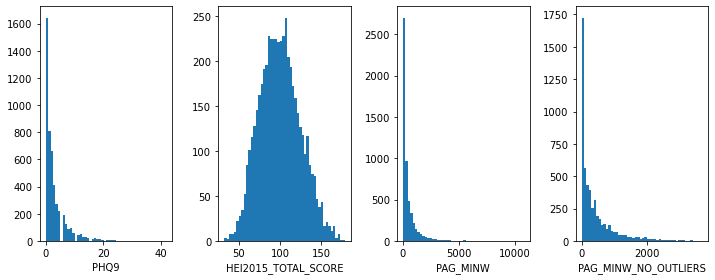

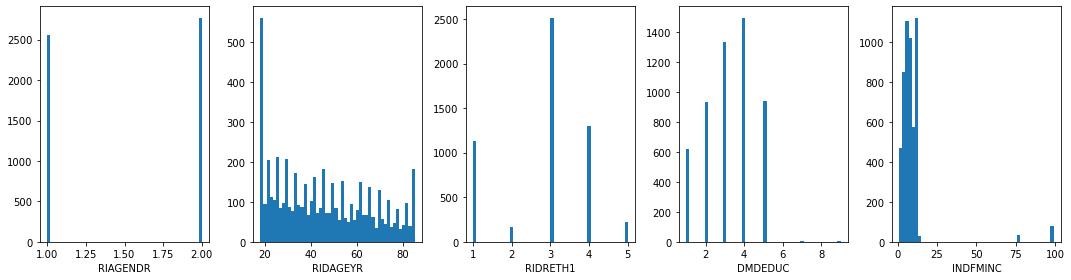

In [26]:
#Creating histogram plots for all variables will be used 
plt.subplots(figsize=(15,4))
for i in range(len(quantitative_variables)):
    plt.subplot(1,6,i+1)
    plt.hist(new_dataset[quantitative_variables[i]], bins = 50, label = quantitative_variables[i])
    plt.xlabel(quantitative_variables[i])
plt.tight_layout() 
plt.show()
plt.subplots(figsize=(15,4))
for i in range(len(qualitative_variables)):
    plt.subplot(1,5,i+1)
    plt.hist(new_dataset[qualitative_variables[i]], bins = 50, label = qualitative_variables[i])
    plt.xlabel(qualitative_variables[i])
plt.tight_layout() 
plt.show()

In [27]:
# We can see that most variables are not normal, let's do some treatment using Log to normalize the variables.
# HEI2015_TOTAL_SCORE will dismissed since is already normal
quantitative_variables = ['PHQ9','PAG_MINW','PAG_MINW_NO_OUTLIERS']
qualitative_variables =['RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC','INDFMINC']
for variable in (qualitative_variables+quantitative_variables):
    new_dataset[variable+'_LOG'] = np.log(new_dataset[variable]+1)

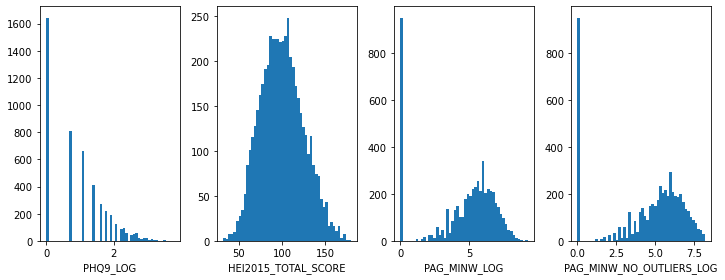

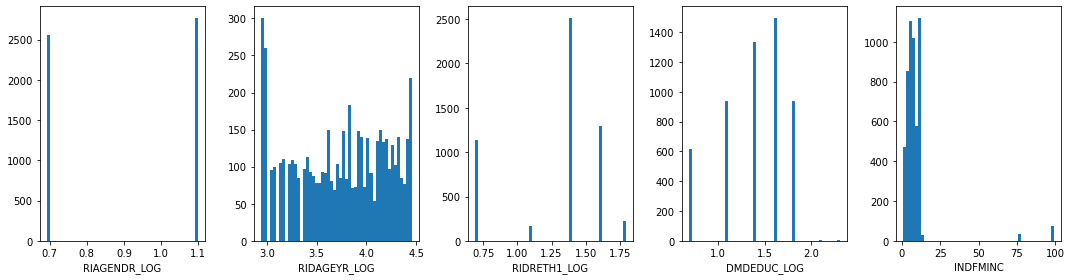

In [28]:
#Creating new histogram plots for all variables will be used 
quantitative_variables = ['PHQ9_LOG','HEI2015_TOTAL_SCORE','PAG_MINW_LOG','PAG_MINW_NO_OUTLIERS_LOG']
qualitative_variables =['RIAGENDR_LOG','RIDAGEYR_LOG','RIDRETH1_LOG','DMDEDUC_LOG','INDFMINC']
plt.subplots(figsize=(15,4))
for i in range(len(quantitative_variables)):
    plt.subplot(1,6,i+1)
    plt.hist(new_dataset[quantitative_variables[i]], bins = 50, label = quantitative_variables[i])
    plt.xlabel(quantitative_variables[i])
plt.tight_layout() 
plt.show()
plt.subplots(figsize=(15,4))
for i in range(len(qualitative_variables)):
    plt.subplot(1,5,i+1)
    plt.hist(new_dataset[qualitative_variables[i]], bins = 50, label = qualitative_variables[i])
    plt.xlabel(qualitative_variables[i])
plt.tight_layout() 
plt.show()

### 3 - Bivariate analysis and statistical inference

### 1st. Test: 

<b>H0: There is no difference between men and women for the degree of depression groups</b>

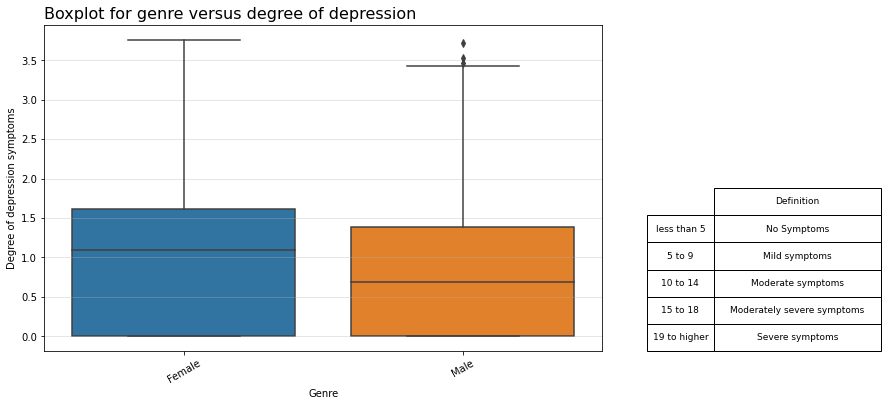

In [29]:
#Boxplot for analyse genre versus degree of depression
ax = sns.boxplot(x = new_dataset['RIAGENDR'].map(genre), y = 'PHQ9_LOG', data = new_dataset)
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 10)
ax.set_ylabel('Degree of depression symptoms', fontsize = 10)
ax.set_xlabel('Genre', fontsize = 10)
ax.set_title('Boxplot for genre versus degree of depression', fontsize = 16, loc = 'left')
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (10,6)
index = ['less than 5', '5 to 9', '10 to 14', '15 to 18', '19 to higher']
definitions = ['No Symptoms','Mild symptoms', 'Moderate symptoms', 'Moderately severe symptoms', 'Severe symptoms']
table = pd.DataFrame(index = index, data = definitions, columns=['Definition'])
plt.table(cellText=table.values,
          rowLabels=table.index,
          colLabels=table.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='right', bbox=[1.2,.0,.3,.5])
ax = ax

In [30]:
#We will use the T-test since we have only two variables to test but it was possible to use one way anova
stats, p_value = ttest_ind(new_dataset[new_dataset['RIAGENDR'] == 1]['PHQ9_LOG'].dropna(),
                           new_dataset[new_dataset['RIAGENDR'] == 2]['PHQ9_LOG'].dropna())
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(22)}')

Stats: -9.46 and P-Value:4.7e-21


Considering Male and Female groups for the degree of depression statisticaly we have diferences, so we can considerer we have evidency to reject the null hypotesis where men and women are different for depression symptoms because P-value is less than 0.05.

### 2nd. Test: 

<b>H0: There is no difference between the degree of depression groups in mean of age</b>

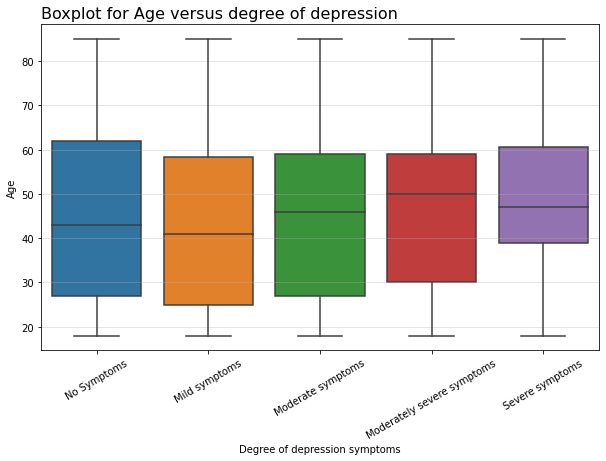

In [41]:
#Boxplot for analyse age versus degree of depression
ax = sns.boxplot(y = new_dataset['RIDAGEYR'], x = 'PHQ_GROUP_NAME', data = new_dataset)
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 10)
ax.set_ylabel('Age', fontsize = 10)
ax.set_xlabel('Degree of depression symptoms', fontsize = 10)
ax.set_title('Boxplot for Age versus degree of depression', fontsize = 16, loc = 'left')
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (10,6)
ax = ax

In [32]:
#We will use the F-Oneway ANOVA since we have more two variables to test
stats, p_value = f_oneway( new_dataset[new_dataset['PHQ_GROUP'] == 0]['RIDAGEYR'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 1]['RIDAGEYR'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 2]['RIDAGEYR'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 3]['RIDAGEYR'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 4]['RIDAGEYR'].dropna(),
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(5)}')

Stats: 1.85 and P-Value:0.11611


Considering the degree of depression groups in the mean ages, statisticaly we do not have diferences, so we cannot considerer that we have evidency to reject the null hypotesis because P-value is more than 0.05.

### 3rd. Test:

<b>H0: There is no difference between the degree of depression groups and weekly total workout minutes</b>

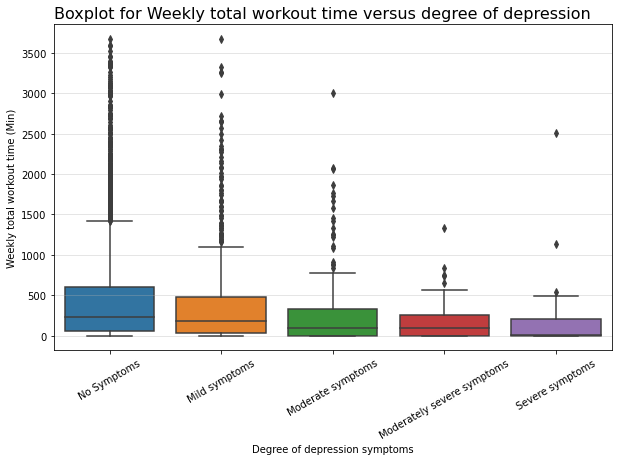

In [42]:
#Boxplot for analyse weekly total workout minutes versus degree of depression
ax = sns.boxplot(y = new_dataset['PAG_MINW_NO_OUTLIERS'], x = 'PHQ_GROUP_NAME', data = new_dataset)
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 10)
ax.set_ylabel('Weekly total workout time (Min)', fontsize = 10)
ax.set_xlabel('Degree of depression symptoms', fontsize = 10)
ax.set_title('Boxplot for Weekly total workout time versus degree of depression', fontsize = 16, loc = 'left')
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (10,6)
ax = ax

In [34]:
#We will use the F-Oneway ANOVA since we have more two variables to test
stats, p_value = f_oneway( new_dataset[new_dataset['PHQ_GROUP'] == 0]['PAG_MINW_LOG'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 1]['PAG_MINW_LOG'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 2]['PAG_MINW_LOG'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 3]['PAG_MINW_LOG'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 4]['PAG_MINW_LOG'].dropna(),
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(10)}')

Stats: 23.58 and P-Value:0.0


Considering the groups for the degree of depression versus the weekly workout minutes, statisticaly we have diferences, so we can considerer that we have evidency to reject the null hypotesis because P-value is less than 0.05.

In [46]:
df = new_dataset[['PHQ_GROUP', 'PAG_MINW_LOG']].dropna()
tukey = pairwise_tukeyhsd(df['PAG_MINW_LOG'], df['PHQ_GROUP'], alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.2566 0.0653 -0.5228  0.0097  False
     0      2  -1.1553    0.0 -1.6154 -0.6952   True
     0      3  -1.1872 0.0001 -1.9193 -0.4551   True
     0      4  -2.1978    0.0 -3.3049 -1.0907   True
     1      2  -0.8987    0.0 -1.4088 -0.3886   True
     1      3  -0.9307  0.008 -1.6952 -0.1662   True
     1      4  -1.9413    0.0 -3.0701 -0.8125   True
     2      3   -0.032    1.0 -0.8836  0.8197  False
     2      4  -1.0426 0.1177 -2.2321   0.147  False
     3      4  -1.0106  0.224 -2.3294  0.3082  False
----------------------------------------------------


<b>Legend for the group of depression:</b><br><br>
0 : No Symptoms<br>
1 : Mild symptoms<br>
2 : Moderate symptoms<br>
3 : Moderately severe symptoms<br>
4 : Severe <br>

- For symptoms versus mild symptoms Tukey test we do not have evidences to reject the null hypotesis since the P-value is > 0.05.It means the group with No and Mild depression simptoms have a weekly workout minutes quite similar.<br>
- For No depression and mild symptoms versus Moderate to severe symptoms of depression we have evidences to reject the null hypotesis since P-value is less than 0.05. It means as more depression symptons less weekly workout.<br>
- On the other hand we see who have Moderate to Severe symptoms of depression we no not have evidence to reject the null hypotesis since the P-value > 0.05. It means who have higher symptons of depression exercises less than who have less symptoms of depression.<br>
<b>As a conclusion we have statistical evidences to say that people with no symptons workout more than people with elevated symptoms of depression.</b>

### 4th. Test:

<b>H0: There is no difference between the degree of depression groups and healthy eating habits</b>

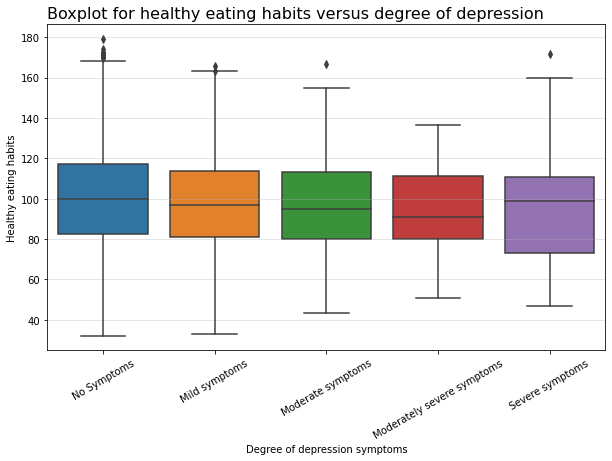

In [43]:
#Boxplot for analyse healthy eating habits versus degree of depression
ax = sns.boxplot(y = new_dataset['HEI2015_TOTAL_SCORE'], x = 'PHQ_GROUP_NAME', data = new_dataset)
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(fontsize = 10)
ax.set_ylabel('Healthy eating habits', fontsize = 10)
ax.set_xlabel('Degree of depression symptoms', fontsize = 10)
ax.set_title('Boxplot for healthy eating habits versus degree of depression', fontsize = 16, loc = 'left')
plt.grid(visible = True, axis = 'y', alpha = 0.4)
ax.figure.set_size_inches (10,6)
ax = ax

In [48]:
#We will use the F-Oneway ANOVA since we have more two variables to test
stats, p_value = f_oneway( new_dataset[new_dataset['PHQ_GROUP'] == 0]['HEI2015_TOTAL_SCORE'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 1]['HEI2015_TOTAL_SCORE'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 2]['HEI2015_TOTAL_SCORE'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 3]['HEI2015_TOTAL_SCORE'].dropna(),
                           new_dataset[new_dataset['PHQ_GROUP'] == 4]['HEI2015_TOTAL_SCORE'].dropna(),
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(5)}')

Stats: 3.6 and P-Value:0.00617


In [49]:
df = new_dataset[['PHQ_GROUP', 'HEI2015_TOTAL_SCORE']].dropna()
tukey = pairwise_tukeyhsd(df['HEI2015_TOTAL_SCORE'], df['PHQ_GROUP'], alpha = 0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -2.5343 0.0943  -5.3179  0.2492  False
     0      2   -3.508 0.2767  -8.3463  1.3304  False
     0      3  -6.5392 0.1439 -14.2864  1.2079  False
     0      4  -4.0052 0.8801 -15.5978  7.5874  False
     1      2  -0.9736 0.9878  -6.3336  4.3863  False
     1      3  -4.0049 0.6585 -12.0881  4.0783  False
     1      4  -1.4708 0.9971 -13.2906 10.3489  False
     2      3  -3.0313 0.8896 -12.0312  5.9687  False
     2      4  -0.4972    1.0 -12.9619 11.9675  False
     3      4   2.5341 0.9875 -11.3215 16.3897  False
-----------------------------------------------------


Although we have seen in ANOVA test where P-value < , 0.05 the Tukey test show us that we donot have evidence to reject the null hypotesis. It mean that healthy eating habits do no have influence in minimize the degree of depression symptoms.